In [19]:
library(repr)
options(repr.plot.width = 6, repr.plot.height = 4)
options(repr.plot.res = 200)

library(ggplot2)

set.seed(1)


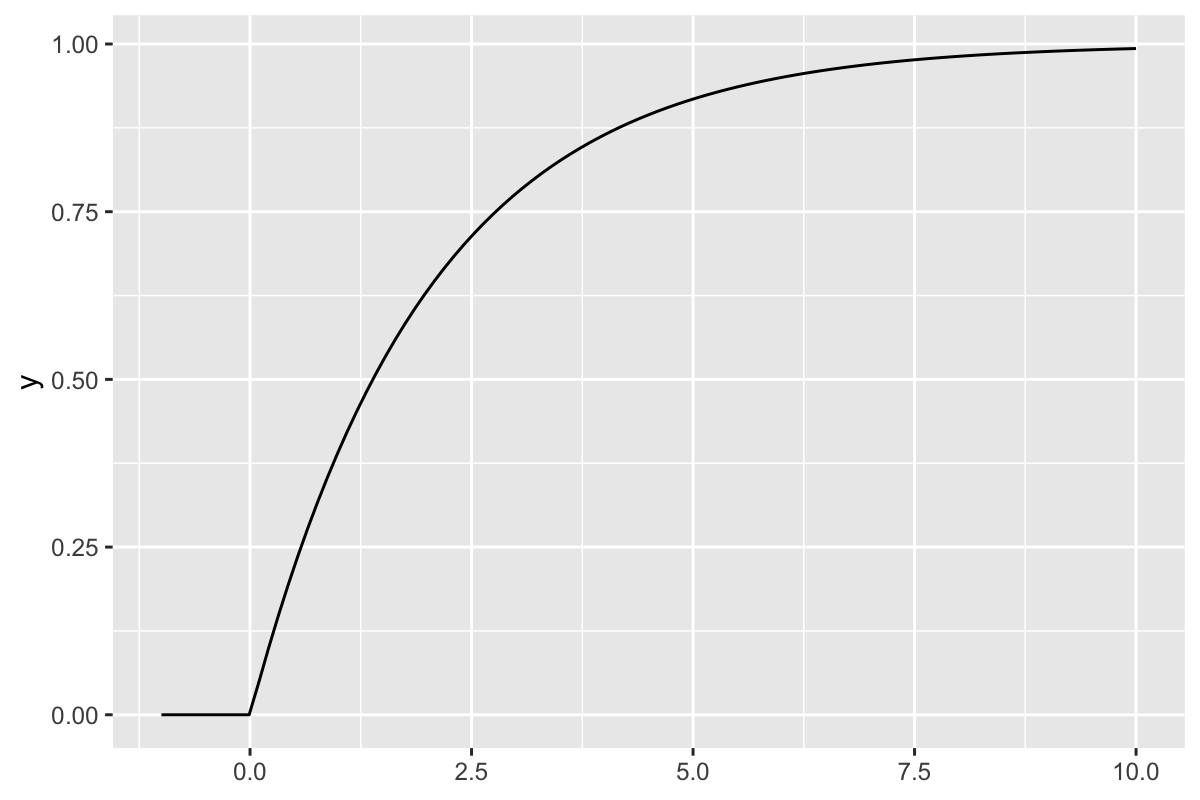

In [20]:
# a) Exponential CDF
ggplot() +
  geom_function(fun = pexp, args = list(rate = 0.5)) +
  xlim(-1, 10)


In [21]:
ecdf <- function(samples) {
  # Order samples
  samples <- sort(samples)

  # Add -2 before ordered samples and 15 at the end
  x <- c(-2, samples, 15)

  # Value of y increases by 1/n
  n <- length(samples)
  y <- c(0, 1:n / n, 1)

  data.frame(x, y, n = rep(factor(n), n + 2))
}


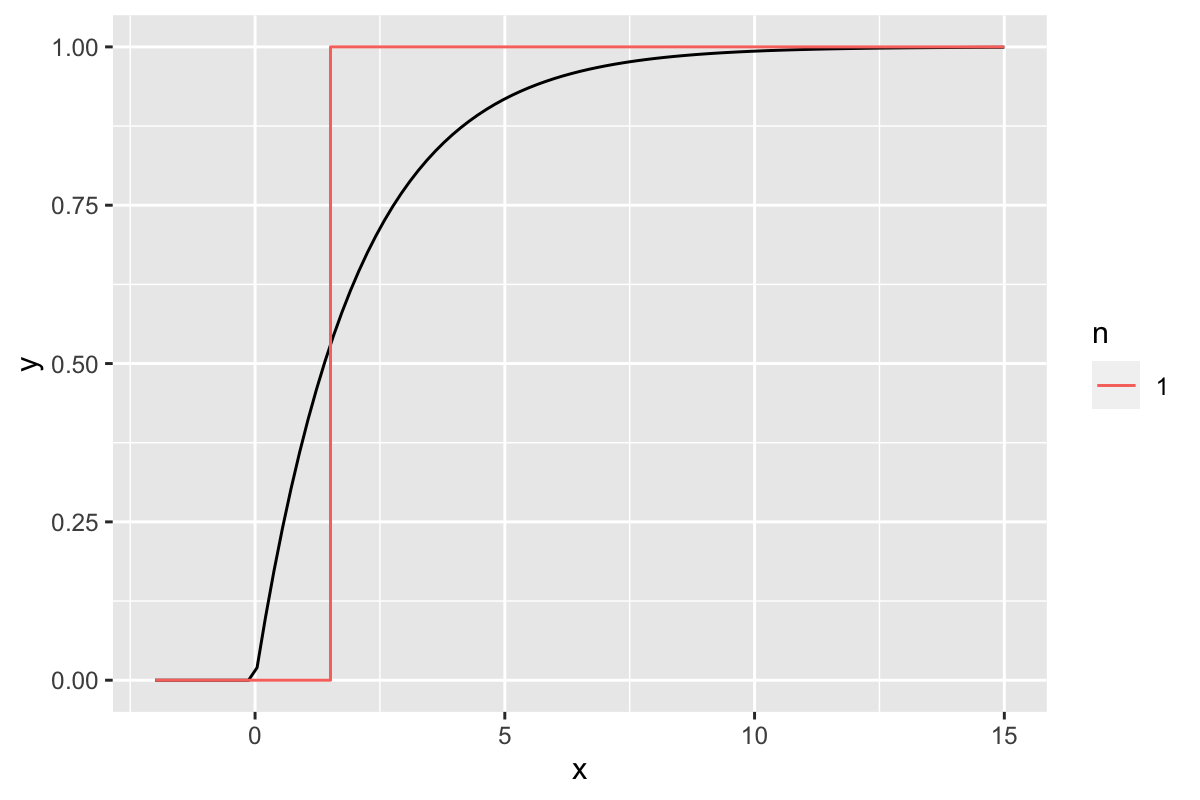

In [22]:
# b) ECDF, n = 1
ecdf(rexp(1, rate = 0.5)) |>
  ggplot(aes(x = x, y = y)) +
  geom_function(fun = pexp, args = list(rate = 0.5)) +
  geom_step(aes(color = n))


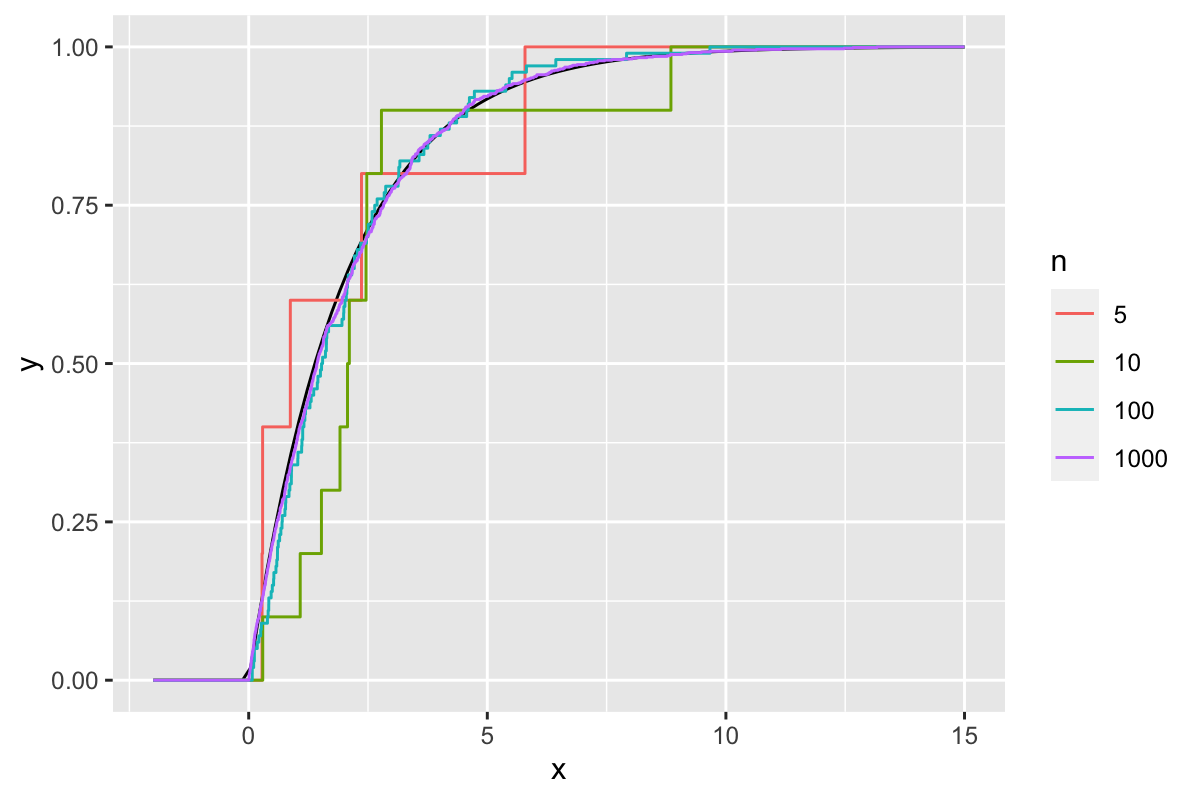

In [23]:
# c) ECDF, n = 5, 10, 100, 1000
n <- c(5, 10, 100, 1000)
Reduce(
  rbind, lapply(n, function(n) ecdf(rexp(n, rate = 0.5)))
) |>
  ggplot(aes(x = x, y = y)) +
  geom_function(fun = pexp, args = list(rate = 0.5)) +
  geom_step(aes(color = n))


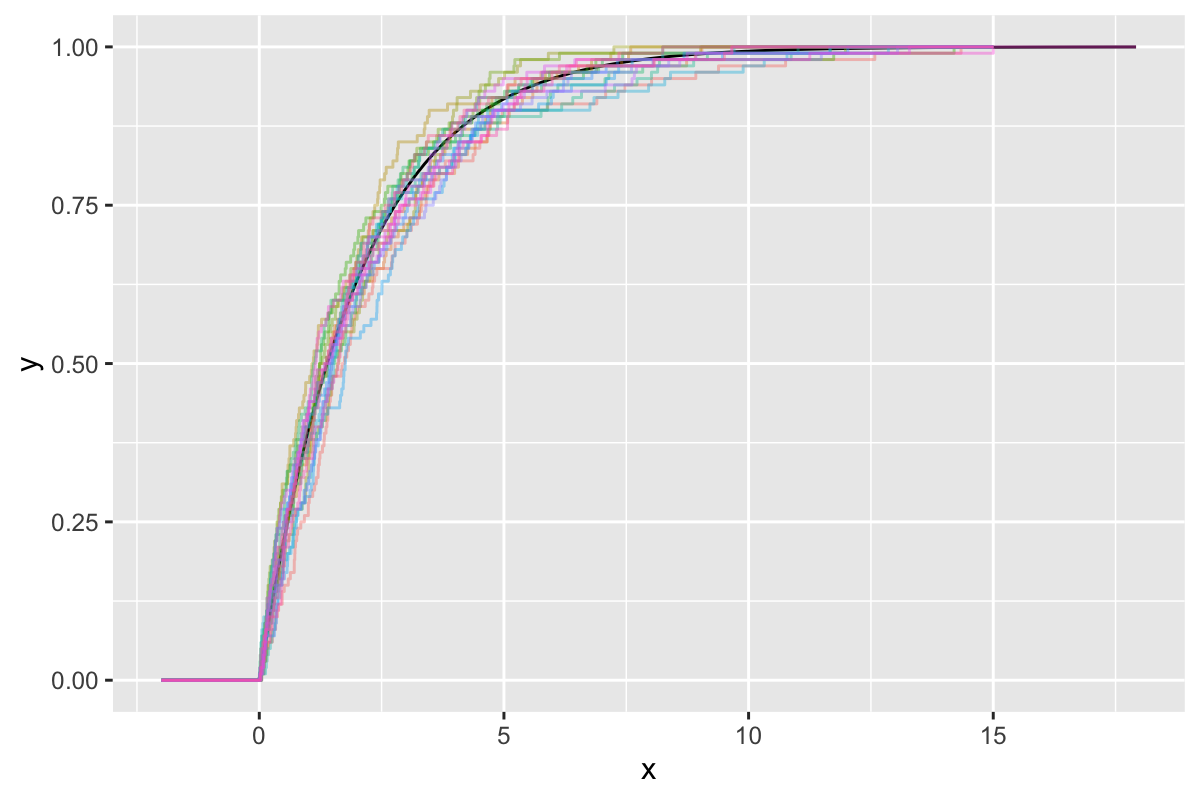

In [24]:
# d) Plot F_n^(i) for n = 100 and i = 1, ..., 20
n <- 100
m <- 20
cbind(
  Reduce(
    rbind, lapply(rep(n, m), function(n) ecdf(rexp(n, rate = 0.5)))
  ),
  data.frame(i = factor(rep(1:m, each = n + 2)))
) |>
  ggplot(aes(x = x, y = y)) +
  geom_function(fun = pexp, args = list(rate = 0.5)) +
  geom_step(aes(color = i), alpha = 0.4) +
  theme(legend.position = "none")
